<a href="https://colab.research.google.com/github/KrisMatrix/Data_Visualization/blob/main/Data_Visualization_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Tutorial/Cheat Sheet

Python's *matplotlib* has amazing data visualization and charting capabilities. However, when I want to draw a chart, I often find it a struggle to plot the chart that I want. To make a good plot, not only do you need to know the charting commands, but you also need to know arrange your data intelligently. Since I don't want to become frustrated with two different problems to create the plot, I created this so that I can just copy paste the code I need for the plot and isntead to focus on the data massaging. I compiled codes from various souces including the matplotlib tutorials. I have added some additional notes or comments that was helpful for me to do my own plots. This is NOT original. It is a cheat sheet, so the contents have some copy/paste from other source, with modifications. The data in these charts are made up and not real data. To that end, drawing any inference from these plots are worthless.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#!wget https://matplotlib.org/stable/_images/anatomy.png

# Part of a Figure

<img src="https://matplotlib.org/stable/_images/anatomy.png" />

**Figure:** Think of it as the canvas. This is where you can have one or more plots.

**Axes:** The Axes is the plot. The plot contains the labels, titles, axis labels, the data points, curves, etc.

**Axis:** This the number lines. For example, the x and y coordinates are called axis.

**Subplot**: A figure can have multiple sub-plots.

**Artists:** For some reason they call artists everything that is on the figure.

The definition I provided are a contextual or illustrative definition. These names also have a python object meaning. 

All of plotting functions expect *numpy.array* or *numpy.ma.masked_array* as input. Classes that are 'array-like' such as pandas data objects and numpy.matrix may or may not work as intended. It is best to convert these to numpy.array objects prior to plotting.

In [ ]:
#For example, to convert a pandas.DataFrame
a = pd.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values

In [ ]:
#To convert a numpy.matrix
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

## The OO-Style

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


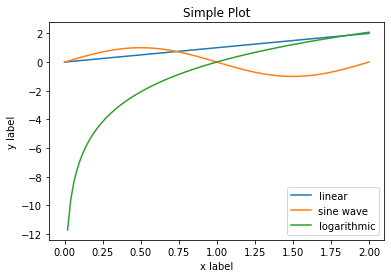

In [ ]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, np.sin(x*np.pi), label='sine wave')  # Plot more data on the axes...
ax.plot(x, np.log(x**3), label='logarithmic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

* plt.subplot(nrows, ncols, index, **kwargs)
* plt.plot(x,y, label="label_name") where y = f(x). Essentially, we are providing the x-values and the y-values for the plot.



## Pyplot style

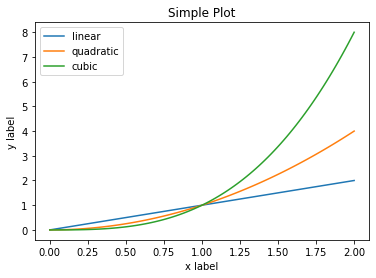

In [ ]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

# Sample plots in Matplotlib

## 1. Line Plot

Line plots are perhaps the most common plots that we might be accustomed to seeing in mathematics. The Line plot, or as I like to think of it - **the continuous plot**, is used here to draw a consine wave.

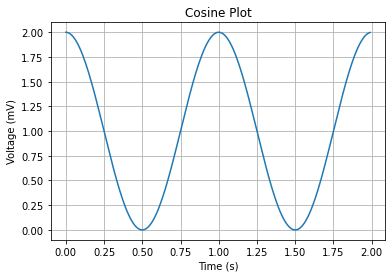

In [ ]:
#Let's draw a line plot of a Cosine curve
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.cos(2 * np.pi * t) #1 + 2 * cos(2*pi*t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Time (s)', ylabel='Voltage (mV)', title='Cosine Plot')
ax.grid()

fig.savefig("cosine_line_plot.png")
plt.show()

## 2. Multiple subplots

Sometimes, it is useful to show multiple plots. We are going to draw two plots (or axes) within a figure.

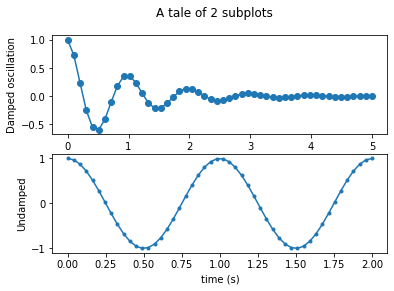

In [ ]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('A tale of 2 subplots')

#The o- and .- are the format string. Refer to https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot
# for the types of format strings. You can set color, line style and markers.
ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()

Alternative Method:

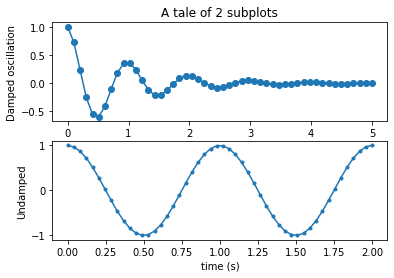

In [ ]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

**When should you use a single axes plot with multiple curves or multiple axes with single curves?** 

This depends on what you want to represent and there is no absolute answer. When trying to compare different curves, a single plot on the same axes may be preferred. However, too many plots can make the axes too cluttered. Simpler plots are usually easier to understand. Consider using multiple plots where clarity can be improved. Multiple plots are particularly useful when you are trying to visualize some data or related information but from different angles or contexts.

## 3. Histogram

A dataset has a distribution. A dataset can have a mean $\mu$ and standard deviation $\sigma$. 

\begin{equation}
y = \mu + \sigma * x
\end{equation}

This is the equation for a **normal distribution**.

We will also draw a best fit line.

\begin{equation}
z = \frac{1}{\sqrt{2*\pi}*\sigma} * e^{-0.5 * {\frac{1}{\sigma} * (bins - \mu)}^2}
\end{equation}


> *ax.hist(x, bins,range,density, weights)*

> **x:** array

> **bins:** If bins is an integer, it defines the number of equal-width bins in the range. If bins is a sequence, it defines the bin edges, including the left edge of the first bin and the right edge of the last bin.

> **density:** if True, draw and return a probability density.

> **Returns**

> **n:** array of the values of the histogram bins

> **bins:** the edges of the bins

> **patches:** contains the information to create the histogram.

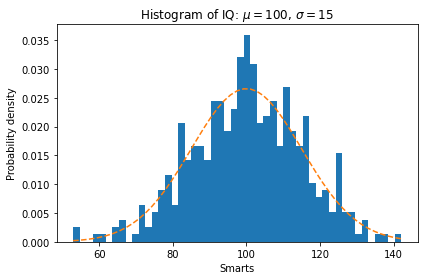

In [ ]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data

n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
z = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, z, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

**How is a histogram different from a bar chart?**

Histograms are used to show distributions of variables while bar charts are used to compare variables. 

## 4. Bar Chart

The bar chart is useful when comparing variables. In this case, we look at fuel sources for electricity and how many Giga Joules (GJ) we are producing from each fuel source. 

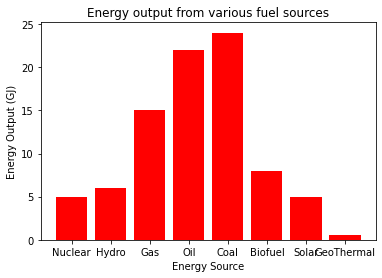

In [ ]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel', 'Solar', 'GeoThermal']
energy = [5, 6, 15, 22, 24, 8, 5, 0.5]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='Red')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

plt.show()

## 5. Error Bars

Consider the same bar chart as above, but with a variance of +/- 10%. 

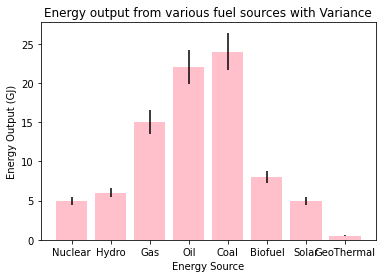

In [ ]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel', 'Solar', 'GeoThermal']
energy = [5, 6, 15, 22, 24, 8, 5, 0.5]
variance = [i * 0.1 for i in energy]  #a variance of 10% of energy
#Note: There is no need for variance to be strictly 10% for all items in
# energy. Here i Used a standardized value.

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='pink', yerr=variance)
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources with Variance")

plt.xticks(x_pos, x)

plt.show()

## 6. Horizontal Bar Chart

**When should you use a vertical bar chart versus a horizontal bar chart?**

There are different benefits to the vertical bar chart versus horizontal bar chart.

* If one of the axis contains text, while the other is numeric, consider a horizontal bar chart with the text-based axis as the y-axis.

* If the data has (or can be organized as) a normal distribution or an inverted bell curve, then consider a vertical bar chart. It is more easier on the eyes to view it this way.

* If the data you wish to represents ought increaseor decreases in sequence, a horizontal bar chart is preferred.

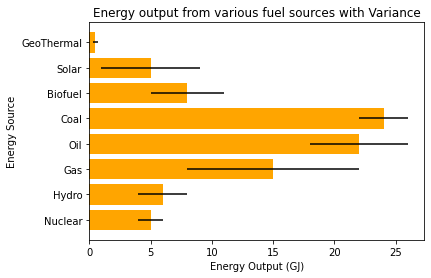

In [ ]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel', 'Solar', 'GeoThermal']
energy = [5, 6, 15, 22, 24, 8, 5, 0.5]
variance = [1, 2, 7, 4, 2, 3, 4, 0.2]

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, energy, color='orange', xerr=variance)   #OBSERVE xerr and barh
plt.ylabel("Energy Source")         
plt.xlabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources with Variance")

plt.yticks(x_pos, x)  #OBSERVE yticks

plt.show()

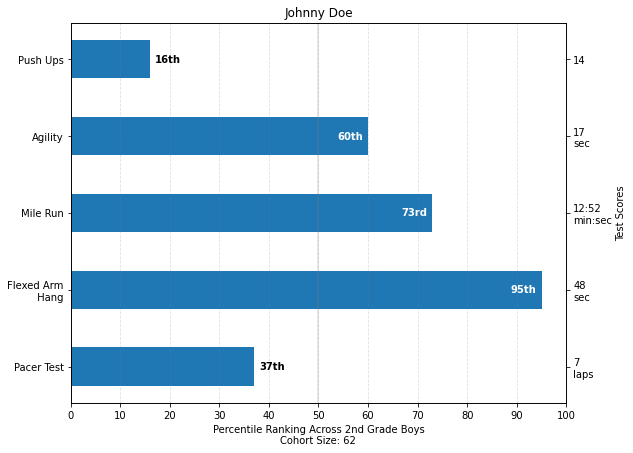

In [ ]:
from matplotlib.ticker import MaxNLocator #Finds up to a max number of intervals with ticks at nice locations.
from collections import namedtuple  #factory function for creating tuple subclasses with named fields

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_units = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(score, test):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    unit = test_units[test]
    if unit:
        return f'{score}\n{unit}'
    else:  # If no unit, don't include a newline, so that label stays centered.
        return score


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7))  # Create the figure
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.manager.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    # Set the tick locations
    ax2.set_yticks(pos)
    # Set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # Set the tick labels
    ax2.set_yticklabels([format_score(scores[k].score, k) for k in test_names])

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rank_str = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(
            rank_str, xy=(width, yloc), xytext=(xloc, 0),
            textcoords="offset points",
            horizontalalignment=align, verticalalignment='center',
            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # Make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # Return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

## 7. Bar Chart with Multiple X’s

Bar chart with multiple X's is usual when comparing the strength of a metric for a few categories. In this example, the categories are (men,women) and the metrics are (strength, intelligence, fine-mobility, flexibility, Charisma)

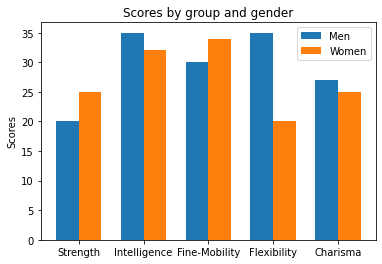

In [ ]:
N = 5
men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind + width, women_means, width,
    label='Women')

plt.ylabel('Scores')
plt.title('Scores by group and gender')

plt.xticks(ind + width / 2, ('Strength', 'Intelligence', 'Fine-Mobility', 'Flexibility', 'Charisma'))
plt.legend(loc='best')
plt.show()

## 8. Stacked Bar Charts

Stacked Bar charts are useful when you want to show case for a given class, the individual components that make up the class as well as the total. In the example below, the class is USA, and the individual components are Gold, Silver and Bronze medals.

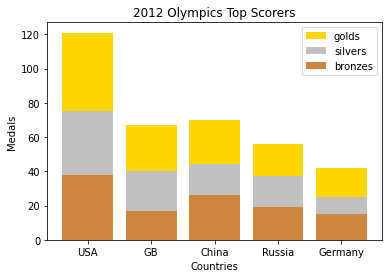

In [ ]:
countries = ['USA', 'GB', 'China', 'Russia', 'Germany']
bronzes = np.array([38, 17, 26, 19, 15])
silvers = np.array([37, 23, 18, 18, 10])
golds = np.array([46, 27, 26, 19, 17])
ind = [x for x, _ in enumerate(countries)]

plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')

plt.xticks(ind, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("2012 Olympics Top Scorers")

plt.show()

If we wanted to view the same bar charts but as a proportion of the total medals won by that country, we can do the following:

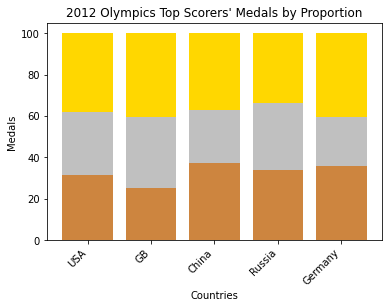

In [ ]:
total = bronzes + silvers + golds
proportion_bronzes = np.true_divide(bronzes, total) * 100
proportion_silvers = np.true_divide(silvers, total) * 100
proportion_golds = np.true_divide(golds, total) * 100

plt.bar(ind, proportion_golds, width=0.8, label='golds', color='gold', bottom=proportion_bronzes+proportion_silvers)
plt.bar(ind, proportion_silvers, width=0.8, label='silvers', color='silver', bottom=proportion_bronzes)
plt.bar(ind, proportion_bronzes, width=0.8, label='bronzes', color='#CD853F')

plt.xticks(ind, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.title("2012 Olympics Top Scorers' Medals by Proportion")
plt.ylim=1.0

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

## 9. Pie Chart

A pie chart is fairly simple and self explanatory. All part of a pie chart should add up to a whole. In percentage terms, the sum of all parts total 100%. 

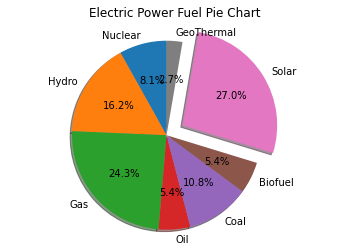

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel', 'Solar', 'GeoThermal'
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10, 20, 10, 50, 5]
explode = (0, 0, 0, 0, 0, 0, 0.2, 0)  # only "explode" the 2nd slice (i.e. 'Solar')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Electric Power Fuel Pie Chart")

plt.show()

## 10. Table Chart

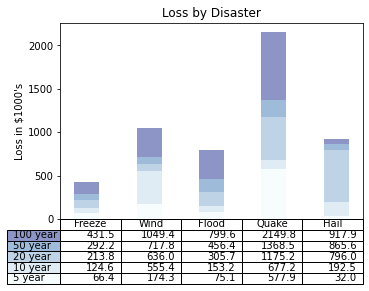

In [ ]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

##11. Scatter Plot

Scatter plots are useful when compared with a line plot if you want to draw distributed data points. This is in contrast to a continuous plot or line plot shown earlier.

Text(0.5, 1.0, 'Scatter Plot of Sine Curve')

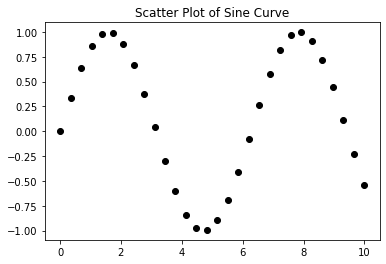

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');
plt.title("Scatter Plot of Sine Curve")

## 12. Log Plots

Log scales can help visualize between large descrepancies of values on a single axis. For example, say you want to compare the relative work done by animal/inspect species. The y axis may be the work done dictaed in joules but the x-axis is their weight. A log plot along the x-axis might be quite useful here.

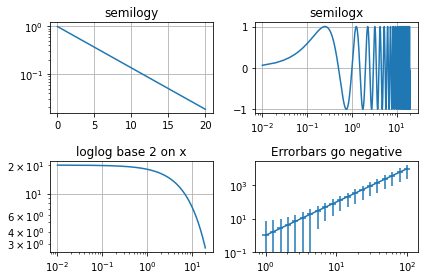

In [ ]:
# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure and allow for a 2x2=4 diagrams
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

#The y axis is logarithmic. x-axis is normal
ax1.semilogy(t, np.exp(-t / 5.0))   #first argument is x axis, second is yaxis.
ax1.set(title='semilogy')
ax1.grid()

#The x axis is logarithmic. y-axis is normal
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

#Both the x and y axis are logarithmic.
ax3.loglog(t, 20 * np.exp(-t / 10.0))
#ax3.set_xscale('log', base=2)
ax3.set_xscale('log')
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

#ax4.set_xscale("log", nonpositive='clip')
ax4.set_xscale("log")
#ax4.set_yscale("log", nonpositive='clip')
ax4.set_yscale("log")
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()
plt.show()

## 13. Polar Plot

A polar chart is useful when you want to compare the magnitude of a quantity with respect to an angle.

Polar charts are often very useful for present data that uses a natural cycle such as daily temperatures or annual rainfall. They're also frequently used in scientific and mathematic applications. When you purchase a microphone, you will find polar charts for them.

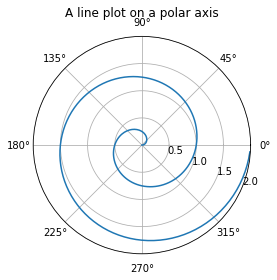

In [ ]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## 14. ColorMesh

The colormesh (such as the one we show below) is useful when you want to represent 3 things and one of those 3 things is not as useful to represent as a number.



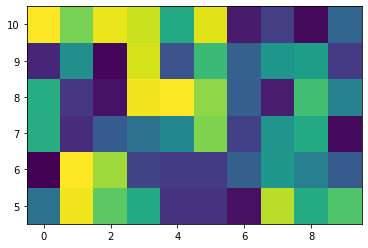

In [ ]:
np.random.seed(42)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

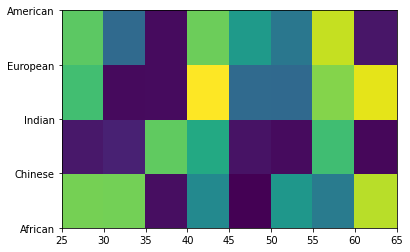

In [ ]:
age = [25, 30, 35, 40, 45, 50, 55, 60, 65]  #x-axis has 9 items
race = ["African", "Chinese", "Indian", "European", "American"] #y-axis has 5 items
weight = np.random.rand(5,9)  #9x5 = 45
#print(weight, weight.shape)

fig, ax = plt.subplots()
ax.pcolormesh(age, race, weight)

## 15. DateTime Chart

In [ ]:
#import matplotlib.dates as mdates
#import matplotlib.cbook as cbook

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
#data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

TypeError: ignored

## 16. 3D plots

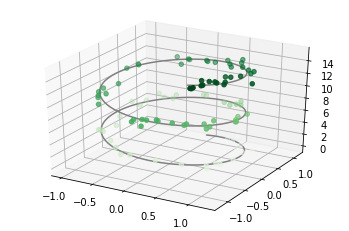

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


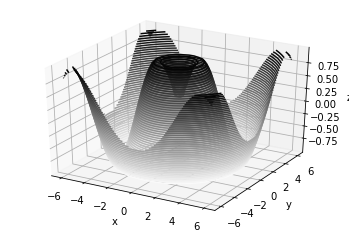

In [ ]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

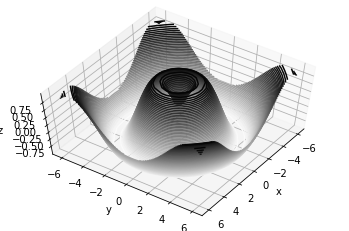

In [ ]:
ax.view_init(60, 35)
fig

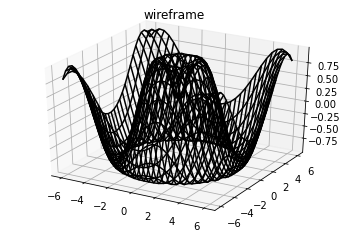

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

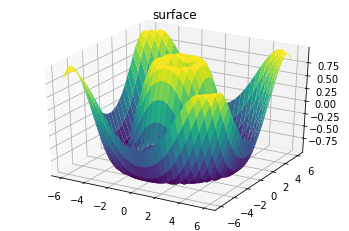

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

# THE END

Data visualization is an art. And there are many, many charts/plots/illustrations/visualization. I have covered many of the common plots, but there are many more. I may add some more over time, but if you need more, refer to the matplotlib documentation: https://matplotlib.org/stable/tutorials/index.html